In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [3]:
df = pd.read_csv('data/train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# number of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# first 5 data values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# shows last 5 values
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# checks for number of duplicate values
df.duplicated().sum()

np.int64(0)

In [11]:
# renaming class
df.rename(columns={'Pclass': 'Passenger Class'}, inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Passenger Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

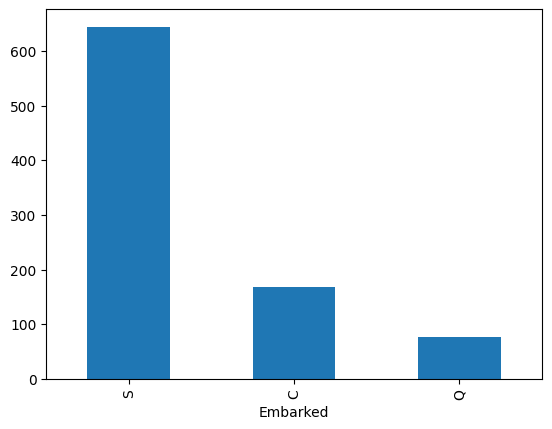

In [14]:
df.Embarked.value_counts().plot(kind='bar')

<Axes: >

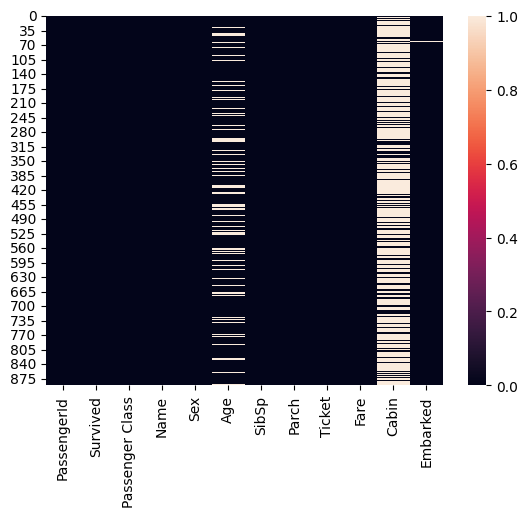

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)

In [17]:
df.isnull().sum()

PassengerId          0
Survived             0
Passenger Class      0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

<Axes: xlabel='Passenger Class'>

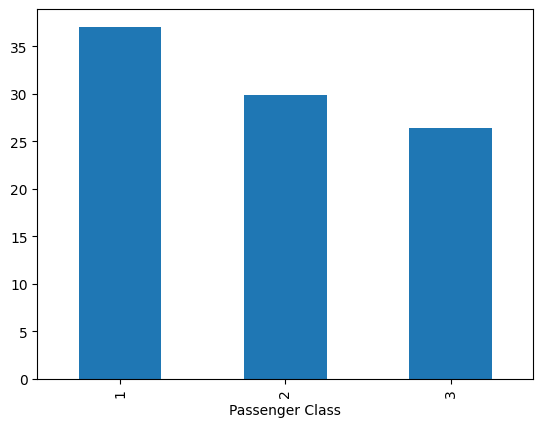

In [18]:
df.groupby(by='Passenger Class')['Age'].mean().plot(kind='bar')

In [33]:
df.dropna(subset=['Cabin'], inplace=True)

In [45]:
df.dropna(inplace=True)

In [60]:
PassengerClass = pd.get_dummies(df['Passenger Class'])

In [64]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [65]:
df.head()

,PassengerId,Survived,Passenger Class,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S


<Axes: xlabel='Age'>

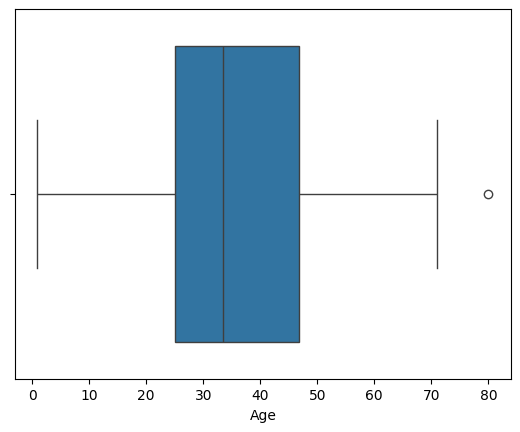

In [68]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

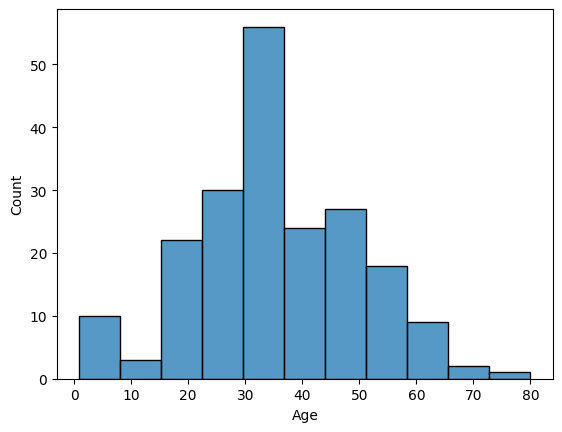

In [71]:
sns.histplot(df['Age'].dropna())

In [90]:
column_np = df['Age'].dropna().to_numpy()

mean = np.mean(column_np)
std_dev = np.std(column_np)

print("Mean is:", mean)
print("Standard Deviation: ", std_dev)

z_scores = stats.zscore(df['Age'])

z_scores.name = "Age_z_scores"



Mean is: 35.112392253931276
Standard Deviation:  14.951329033426582


In [99]:
threshold = 3
outliers = column_np[np.abs(z_scores) > threshold]
print(outliers)

[80.]
